In [2]:
install.packages("jsonlite",repos='http://cran.us.r-project.org')
devtools::install_github("sailthru/tidyjson")
install.packages("doParallel")
install.packages(('BBmisc'))
install.packages("DT")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Warning message in system(cmd):
“error in running command”Warning message in utils::untar(tarfile, ...):
“‘/bin/gzip -dc '/tmp/RtmpWYAAwz/file69c25f53b273.tar.gz' | /bin/gtar -xf '-' -C '/tmp/RtmpWYAAwz/remotes69c26915e3a7'’ returned error code 127”Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”

ERROR: Error in length(file_list) > 0: error in running command


In [ ]:
install.packages("devtools")

In [ ]:
install.packages("jsonlite",repos='http://cran.us.r-project.org')
devtools::install_github("sailthru/tidyjson")
install.packages("doParallel")
install.packages(('BBmisc'))
install.packages("DT")

In [ ]:
install.packages("devtools", repos='http://cran.us.r-project.org')


In [ ]:
install.packages("jsonlite",repos='http://cran.us.r-project.org')
devtools::install_github("sailthru/tidyjson")
install.packages("doParallel")
install.packages(('BBmisc'))
install.packages("DT")

In [ ]:
install.packages("doParallel")
install.packages(('BBmisc'))
install.packages("DT")

In [ ]:
library(githubinstall)
githubinstall("sailthru/tidyjson")

In [2]:
# suppressWarnings(suppressMessages(library(jsonlite)))
# suppressWarnings(suppressMessages(library(tidyjson)))
suppressWarnings(suppressMessages(library(plyr)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(recommenderlab)))
suppressWarnings(suppressMessages(library(knitr)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressWarnings(suppressMessages(library(ggplot2)))

# user-item matrix
suppressWarnings(suppressMessages(library(stringi)))
suppressWarnings(suppressMessages(library(Matrix)))
suppressWarnings(suppressMessages(library(DT)))


In [5]:
business<- read.csv("./restaurant_dataset/business.csv")

In [6]:
user <- read.csv("./restaurant_dataset/user_1.csv")

for (i in c(2:4)){
  a<- paste0('./restaurant_dataset/user_',i,'.csv')
  user_1 <- read.csv(a)
  user <- rbind(user, user_1)
}

In [13]:
user


X,user_id,name,review_count,useful,funny,cool,fans,average_stars
1,EZmocAborM6z66rTzeZxzQ,Rob,761,18456,12316,17579,298,3.59
2,myql3o3x22_ygECb8gVo7A,Vivian,80,117,28,104,34,4.29
3,FIk4lQQu1eTe2EpzQ4xhBA,Carol,841,58,6,5,48,4.15
4,ojovtd9c8GIeDiB8e0mq2w,Miss Maggie,376,42,51,42,28,3.82
5,uVEoZmmL9yK0NMgadLL0CQ,Jeremy,28,8,3,3,2,2.97
6,TprC8sujz8MkwuomrqUSiw,Ramsey,194,5,0,0,9,3.76
7,De-dImXf-TOFWWPTUWwIvw,Ben,111,18,11,11,4,4.04
8,vWXDkGEvICWNCjBW_fKBlg,Carrie,260,89,21,17,21,3.73
9,JMTr179r5SGHC_rPUBSWfQ,Slavisa,30,23,7,2,1,3.42
10,s7XIFcwZnhEUMzSZ4EiAHA,Javier,96,29,8,8,3,3.39


In [55]:
#read the rating files

rating <- read.csv("./restaurant_dataset/rating_1.csv")

for (i in c(2:7)){
  a<- paste0(cat('"'),'./restaurant_dataset/rating_',i,'.csv',cat('"'))
  rating_1 <- read.csv(a)
  rating <- rbind(rating, rating_1)
}

""""""""""""

In [56]:
rating

X,user_id,business_id,document.id,stars,useful,funny,cool,restaurant,user
1,---1lKK3aKOuomHnwAkAow,YCEZLECK9IToE8Mysorbhw,54219,5,3,0,2,Daily Kitchen Modern Eatery and Rotisserie,Monera
2,---1lKK3aKOuomHnwAkAow,D1PhUlkQA1ZsVe9Cx4yqOw,14186,5,1,1,0,The Placenta Lady,Monera
3,---1lKK3aKOuomHnwAkAow,5aeR9KcboZmhDZlFscnYRA,3864,5,1,0,0,Fresh Mama,Monera
4,---1lKK3aKOuomHnwAkAow,t6WY1IrohUecqNjd9bG42Q,51335,4,2,0,0,Red Velvet Cafe,Monera
5,---1lKK3aKOuomHnwAkAow,igHYkXZMLAc9UdV5VnR_AA,3774,5,0,0,0,Echo & Rig,Monera
6,---1lKK3aKOuomHnwAkAow,OicpDroqnfmbtw5jSgf4lQ,5614,5,0,0,0,Craig P Kenny & Associates,Monera
7,---1lKK3aKOuomHnwAkAow,d7Jgj1h_MILumtsTlb2aXA,55949,5,1,0,1,Aloha Aquatic Center,Monera
8,---1lKK3aKOuomHnwAkAow,OnnvNs2JJ-B2xbwHEHbWDw,31032,5,1,0,0,Royal Printing,Monera
9,---1lKK3aKOuomHnwAkAow,nVcMNfey80dCQg35h9uAXA,74442,5,1,0,0,Vexed By Design,Monera
10,---1lKK3aKOuomHnwAkAow,kosTPb88O4Q0XGbVbEOGCA,41728,4,1,0,0,Prommares Thai Food,Monera


In [57]:
rating_copy  <- rating

rating <- rating[,c("restaurant", "business_id", "user", "user_id","stars", "useful", "funny", "cool" ,"document.id")]

kable(head(rating,n=5))



|restaurant                                 |business_id            |user   |user_id                | stars| useful| funny| cool| document.id|
|:------------------------------------------|:----------------------|:------|:----------------------|-----:|------:|-----:|----:|-----------:|
|Daily Kitchen Modern Eatery and Rotisserie |YCEZLECK9IToE8Mysorbhw |Monera |---1lKK3aKOuomHnwAkAow |     5|      3|     0|    2|       54219|
|The Placenta Lady                          |D1PhUlkQA1ZsVe9Cx4yqOw |Monera |---1lKK3aKOuomHnwAkAow |     5|      1|     1|    0|       14186|
|Fresh Mama                                 |5aeR9KcboZmhDZlFscnYRA |Monera |---1lKK3aKOuomHnwAkAow |     5|      1|     0|    0|        3864|
|Red Velvet Cafe                            |t6WY1IrohUecqNjd9bG42Q |Monera |---1lKK3aKOuomHnwAkAow |     4|      2|     0|    0|       51335|
|Echo & Rig                                 |igHYkXZMLAc9UdV5VnR_AA |Monera |---1lKK3aKOuomHnwAkAow |     5|      0|     0|    0|        377

In [74]:
rating

restaurant,user,business_id,user_id,stars,useful,funny,cool,document.id,user_No,restaurant_No
:10 Minute Manicure,Lindsay,1M9kELc6SDZDs3UPMDRF6Q,0ltgWEg8_n8BMmul-ETa4Q,4,0,0,0,151,428,24812
:10 Minute Manicure,Crystal,1M9kELc6SDZDs3UPMDRF6Q,jVYzrVblDFSuL3GHtt8ZSA,4,2,0,2,154,292,24812
:10 Minute Manicure,ML,1M9kELc6SDZDs3UPMDRF6Q,1pZnXhra1y0R_IFpIUyVvw,5,0,0,0,152,4351,24812
:10 Minute Manicure,R.,1M9kELc6SDZDs3UPMDRF6Q,Eq3Pr0AHAngWA1UW7PB6-A,2,0,0,0,153,1541,24812
.99 Cent Pizza Place,Chris,B8GKsrIRRLChyFioejPINg,6ywZ6BHXvdas8o-omBli8g,3,0,0,0,2602,340,44914
.99 Cent Pizza Place,JoAnne,B8GKsrIRRLChyFioejPINg,fANvDmI6BiFGaEd9qC630A,3,0,0,0,2603,1503,44914
.99 Cent Pizza Place,E,B8GKsrIRRLChyFioejPINg,Vr3SHxUYhxa9q5QBwoYdBQ,4,3,0,1,2601,176,44914
.99 Cent Pizza Place,Pamela,B8GKsrIRRLChyFioejPINg,KcXa27KaMt93L6fq_sbaug,5,1,0,2,2604,1657,44914
.99 Cent Pizza Place,J. P.,B8GKsrIRRLChyFioejPINg,U5SyLOejvB1_wLRq_nN2gA,4,0,0,1,2605,53222,44914
.99 Cent Pizza Place,Greg,B8GKsrIRRLChyFioejPINg,CIJsgEIJJT89KJemnaWW0A,4,2,0,1,2599,187,44914


In [58]:
udf <- data.frame(user_No= seq(1:length(unique(rating[,"user"]))),user= unique(rating[,"user"]))
idf <- data.frame(restaurant_No= seq(1:length(unique(rating[,"restaurant"]))),restaurant=unique(rating[,"restaurant"]))

rating <- merge(rating,udf,by.x='user',by.y='user')
rating <- merge(rating,idf,by.x='restaurant',by.y='restaurant')



In [76]:
rating

restaurant,user,business_id,user_id,stars,useful,funny,cool,document.id,user_No,restaurant_No
:10 Minute Manicure,Lindsay,1M9kELc6SDZDs3UPMDRF6Q,0ltgWEg8_n8BMmul-ETa4Q,4,0,0,0,151,428,24812
:10 Minute Manicure,Crystal,1M9kELc6SDZDs3UPMDRF6Q,jVYzrVblDFSuL3GHtt8ZSA,4,2,0,2,154,292,24812
:10 Minute Manicure,ML,1M9kELc6SDZDs3UPMDRF6Q,1pZnXhra1y0R_IFpIUyVvw,5,0,0,0,152,4351,24812
:10 Minute Manicure,R.,1M9kELc6SDZDs3UPMDRF6Q,Eq3Pr0AHAngWA1UW7PB6-A,2,0,0,0,153,1541,24812
.99 Cent Pizza Place,Chris,B8GKsrIRRLChyFioejPINg,6ywZ6BHXvdas8o-omBli8g,3,0,0,0,2602,340,44914
.99 Cent Pizza Place,JoAnne,B8GKsrIRRLChyFioejPINg,fANvDmI6BiFGaEd9qC630A,3,0,0,0,2603,1503,44914
.99 Cent Pizza Place,E,B8GKsrIRRLChyFioejPINg,Vr3SHxUYhxa9q5QBwoYdBQ,4,3,0,1,2601,176,44914
.99 Cent Pizza Place,Pamela,B8GKsrIRRLChyFioejPINg,KcXa27KaMt93L6fq_sbaug,5,1,0,2,2604,1657,44914
.99 Cent Pizza Place,J. P.,B8GKsrIRRLChyFioejPINg,U5SyLOejvB1_wLRq_nN2gA,4,0,0,1,2605,53222,44914
.99 Cent Pizza Place,Greg,B8GKsrIRRLChyFioejPINg,CIJsgEIJJT89KJemnaWW0A,4,2,0,1,2599,187,44914


In [61]:
rating_mx <- sparseMatrix(
  i =  rating$user_No, 
  j =  rating$restaurant_No, 
  x = rating$stars, 
  dimnames = list(levels(rating$user_No), levels(rating$restaurant_No))
)


mx <- as(rating_mx,"realRatingMatrix")
#setting itemlabels



In [77]:
mx

63076 x 65432 rating matrix of class ‘realRatingMatrix’ with 1409141 ratings.

In [79]:
colnames(mx) <- paste("R", 1:65432, sep = "")
as(mx[1,1:10],"list")


$U1
 R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 
  5   5   5   4   5   5   5   5   5   4 

$U2
R5 
 5 

$U3
named numeric(0)

$U4
named numeric(0)

$U5
named numeric(0)

In [63]:
rownames(mx) <- paste("U", 1:63076, sep = "")
as(mx[1,1:10], "list")

$U1
 R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 
  5   5   5   4   5   5   5   5   5   4

In [82]:
mx_n <- normalize(mx)

#view the matrix
getRatingMatrix(mx)[1:10,1:6]

10 x 6 sparse Matrix of class "dgCMatrix"
    R1 R2 R3 R4 R5 R6
U1   5  5  5  4  5  5
U2   .  .  .  .  5  .
U3   .  .  .  .  .  .
U4   .  .  .  .  .  .
U5   .  .  .  .  .  .
U6   .  .  .  1  5  .
U7   .  .  .  4  5  .
U8   1  .  .  .  5  .
U9   .  .  .  .  .  .
U10  .  .  .  4  .  .

In [65]:
summary(rating[, 'stars'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.716   5.000   5.000 

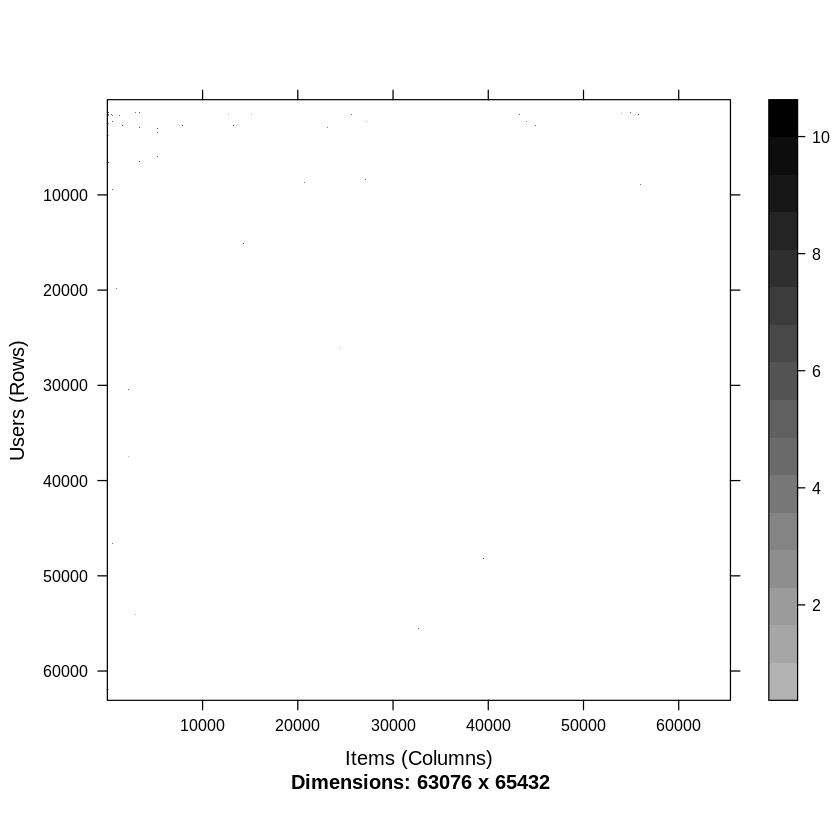

In [75]:
image(mx)

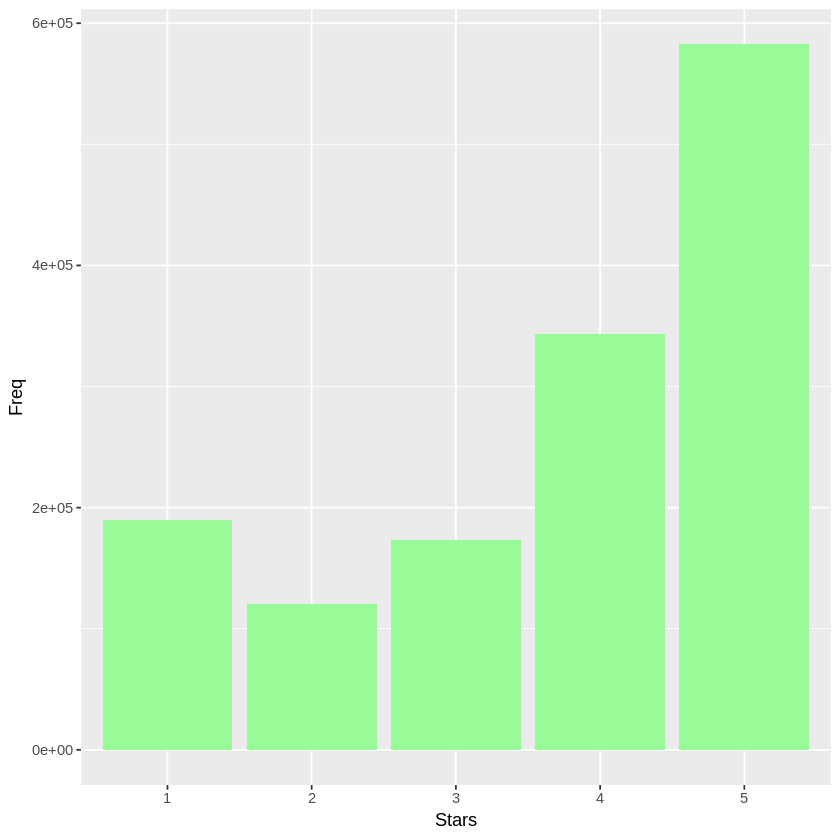

In [69]:
#distribution of ratings
rating_frq <- as.data.frame(table(rating$stars))

ggplot(rating_frq,aes(Var1,Freq)) +   
  geom_bar(aes(fill = Var1), position = "dodge", stat="identity",fill="palegreen")+ labs(x = "Stars")

In [83]:
business_mean <- data.frame(restaurant = idf$restaurant, average_stars=colMeans(mx))

business_mean

ERROR: Error in data.frame(restaurant = idf$restaurant, average_stars = idf$stars): arguments imply differing number of rows: 65432, 0
